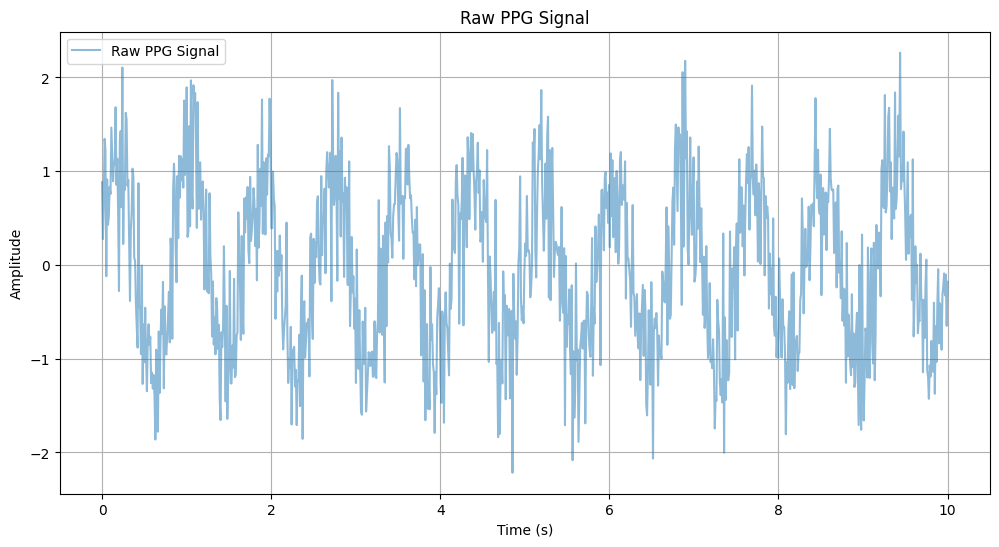

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Generate sample PPG signal
np.random.seed(0)
time = np.linspace(0, 10, 1000)
ppg_signal = np.sin(2 * np.pi * 1.2 * time) + 0.5 * np.random.normal(size=len(time))

# Plot 1: Raw PPG Signal
plt.figure(figsize=(12, 6))
plt.plot(time, ppg_signal, label="Raw PPG Signal", alpha=0.5)
plt.title("Raw PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()


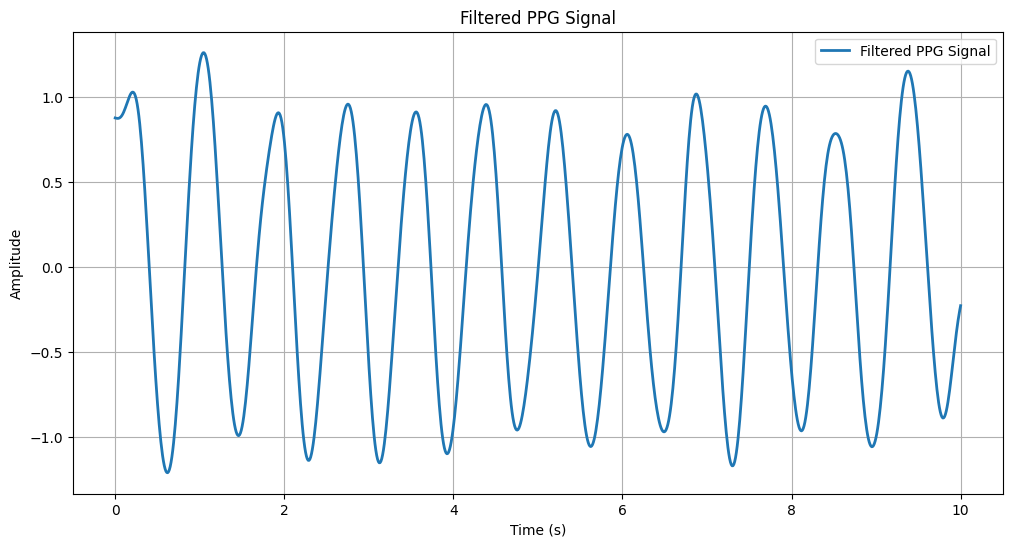

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Define the lowpass filter function
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter settings
fs = 100  # Sampling frequency in Hz
cutoff = 3  # Cutoff frequency in Hz

# Generate sample PPG signal
np.random.seed(0)
time = np.linspace(0, 10, 1000)
ppg_signal = np.sin(2 * np.pi * 1.2 * time) + 0.5 * np.random.normal(size=len(time))

# Apply the filter
filtered_ppg = butter_lowpass_filter(ppg_signal, cutoff, fs)

# Plot 2: Filtered PPG Signal
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ppg, label="Filtered PPG Signal", linewidth=2)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()


Detected Systolic Peaks: 12
Detected Diastolic Valleys: 13
Estimated Heart Rate: 71.98 BPM


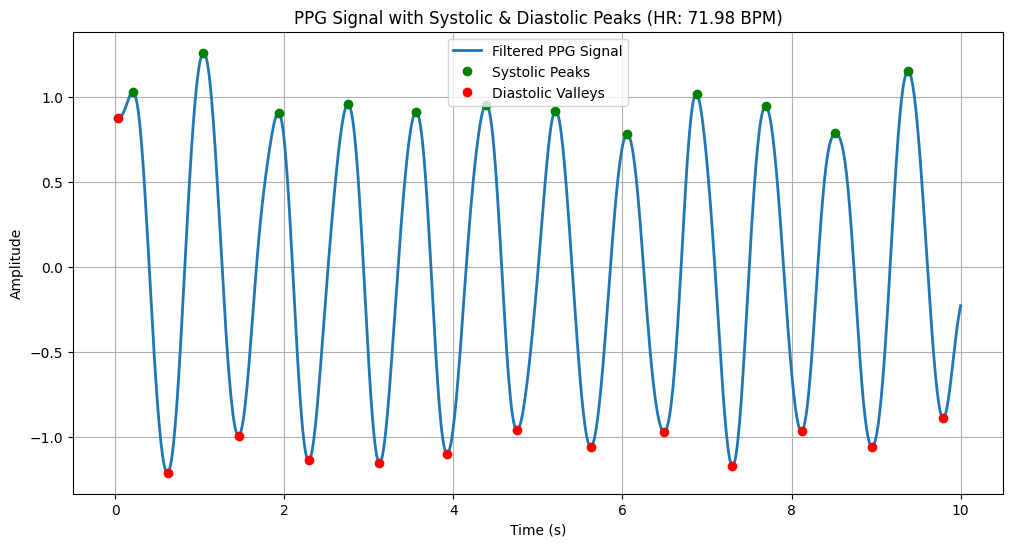

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Define the lowpass filter function
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter settings
fs = 100  # Sampling frequency in Hz
cutoff = 3  # Cutoff frequency in Hz

# Generate sample PPG signal
np.random.seed(0)
time = np.linspace(0, 10, 1000)
ppg_signal = np.sin(2 * np.pi * 1.2 * time) + 0.5 * np.random.normal(size=len(time))

# Apply the filter
filtered_ppg = butter_lowpass_filter(ppg_signal, cutoff, fs)

# Detect systolic peaks (higher peaks)
peaks, _ = find_peaks(filtered_ppg, distance=50)  

# Detect diastolic valleys (inverted peaks)
valleys, _ = find_peaks(-filtered_ppg, distance=50)  

# Extract peak values
systolic_values = filtered_ppg[peaks]
diastolic_values = filtered_ppg[valleys]

# Compute Heart Rate (HR)
if len(peaks) > 1:
    peak_intervals = np.diff(time[peaks])  # Time difference between peaks
    avg_interval = np.mean(peak_intervals)  # Average time between peaks
    heart_rate = 60 / avg_interval  # Convert to BPM
else:
    heart_rate = 0  # If no peaks detected, HR is undefined

# Print results
print(f"Detected Systolic Peaks: {len(peaks)}")
print(f"Detected Diastolic Valleys: {len(valleys)}")
print(f"Estimated Heart Rate: {heart_rate:.2f} BPM")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time, filtered_ppg, label="Filtered PPG Signal", linewidth=2)
plt.plot(time[peaks], filtered_ppg[peaks], "go", label="Systolic Peaks")
plt.plot(time[valleys], filtered_ppg[valleys], "ro", label="Diastolic Valleys")
plt.title(f"PPG Signal with Systolic & Diastolic Peaks (HR: {heart_rate:.2f} BPM)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()
